In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
df = pd.read_csv('wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [3]:
data = df.drop('label', axis=1)
label = df['label']

In [4]:
train_d, test_d, train_l, test_l = train_test_split(data, label, test_size=0.3, random_state=0)

In [5]:
param_grid = {'C': [0.1, 1, 10, 1e2, 1e3, 1e4, 1e5], 'gamma': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1,1]}

clf = GridSearchCV(SVC(), param_grid, cv=4)
clf.fit(train_d, train_l)
res = clf.cv_results_

res_df = pd.DataFrame(res)

In [6]:
res_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003144,0.000600,0.001852,0.000180,0.1,1e-10,"{'C': 0.1, 'gamma': 1e-10}",0.419355,0.387097,0.387097,0.387097,0.395161,0.013968,52
1,0.003274,0.000419,0.001824,0.000273,0.1,1e-09,"{'C': 0.1, 'gamma': 1e-09}",0.419355,0.387097,0.387097,0.387097,0.395161,0.013968,52
2,0.002623,0.000166,0.001481,0.000061,0.1,1e-08,"{'C': 0.1, 'gamma': 1e-08}",0.419355,0.387097,0.387097,0.387097,0.395161,0.013968,52
3,0.002491,0.000458,0.001473,0.000079,0.1,1e-07,"{'C': 0.1, 'gamma': 1e-07}",0.419355,0.387097,0.387097,0.387097,0.395161,0.013968,52
4,0.002192,0.000137,0.001350,0.000012,0.1,1e-06,"{'C': 0.1, 'gamma': 1e-06}",0.645161,0.677419,0.709677,0.612903,0.661290,0.036066,36


In [8]:
res_df.sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
69,0.003813,0.000863,0.001347,0.000062,100000,1e-07,"{'C': 100000.0, 'gamma': 1e-07}",0.838710,0.967742,1.0,0.903226,0.927419,0.061945,1
70,0.006610,0.003408,0.001309,0.000002,100000,1e-06,"{'C': 100000.0, 'gamma': 1e-06}",0.806452,0.870968,1.0,0.967742,0.911290,0.076931,2
59,0.003297,0.000656,0.001310,0.000002,10000,1e-06,"{'C': 10000.0, 'gamma': 1e-06}",0.774194,0.903226,1.0,0.870968,0.887097,0.080645,3


In [9]:
param_C = [res_df.loc[69].param_C, res_df.loc[70].param_C, res_df.loc[59].param_C]
param_gamma = [res_df.loc[69].param_gamma, res_df.loc[70].param_gamma, res_df.loc[59].param_gamma]

In [11]:
for i in range(len(param_C)):
    clf = SVC(C=param_C[i], gamma=param_gamma[i])
    clf.fit(train_d, train_l)
    print(f"C={param_C[i]},\tgamma={param_gamma[i]}\tScore: {clf.score(test_d, test_l)*100:.3f}%")

C=100000.0,	gamma=1e-07	Score: 96.296%
C=100000.0,	gamma=1e-06	Score: 98.148%
C=10000.0,	gamma=1e-06	Score: 94.444%


In [38]:
score1 = []
score2 = []
score3 = []
for n in range(1,1000):
    train_d, test_d, train_l, test_l = train_test_split(data, label, test_size=0.3, random_state=n)
    for i in range(len(param_C)):
        clf = SVC(C=param_C[i], gamma=param_gamma[i])
        clf.fit(train_d, train_l)
        if i == 0:
            score1.append(clf.score(test_d, test_l))
        elif i == 1:
            score2.append(clf.score(test_d, test_l))
        elif i == 2:
            score3.append(clf.score(test_d, test_l))

scores = [np.mean(score1), np.mean(score2), np.mean(score3)]
for i in range(len(param_C)):
    print(f"C={param_C[i]},\tgamma={param_gamma[i]}\tAveScore: {scores[i]*100:.3f}%")

C=100000.0,	gamma=1e-07	AveScore: 94.057%
C=100000.0,	gamma=1e-06	AveScore: 94.639%
C=10000.0,	gamma=1e-06	AveScore: 93.395%


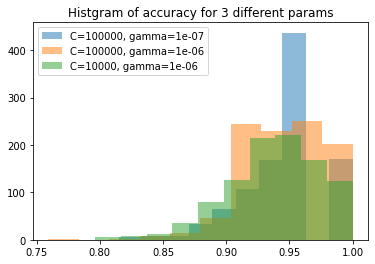

In [40]:
from matplotlib import pyplot as plt

plt.hist(score1, label='C=100000, gamma=1e-07', alpha=0.5)
plt.hist(score2, label='C=100000, gamma=1e-06', alpha=0.5)
plt.hist(score3, label='C=10000, gamma=1e-06', alpha=0.5)
plt.legend()
plt.title('Histgram of accuracy for 3 different params')
plt.show()